<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


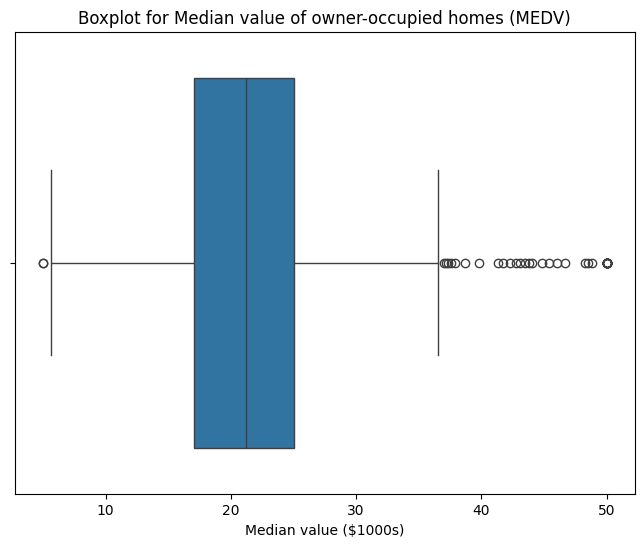

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot for Median value of owner-occupied homes (MEDV)')
plt.xlabel('Median value ($1000s)')
plt.show()


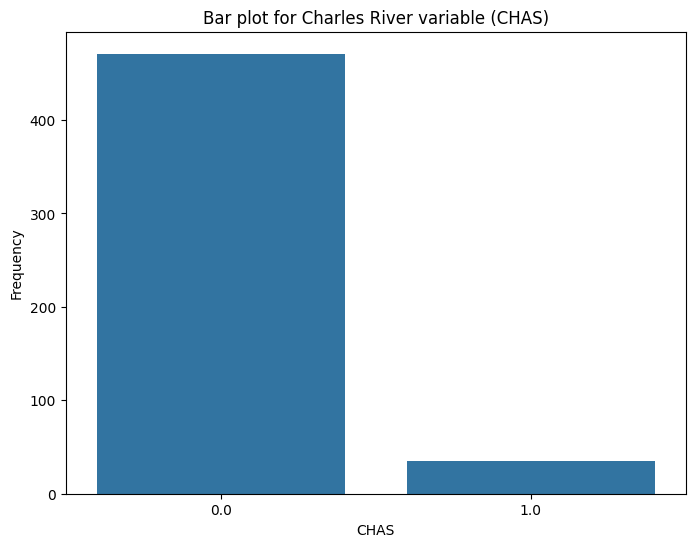

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar plot for Charles River variable (CHAS)')
plt.xlabel('CHAS')
plt.ylabel('Frequency')
plt.show()


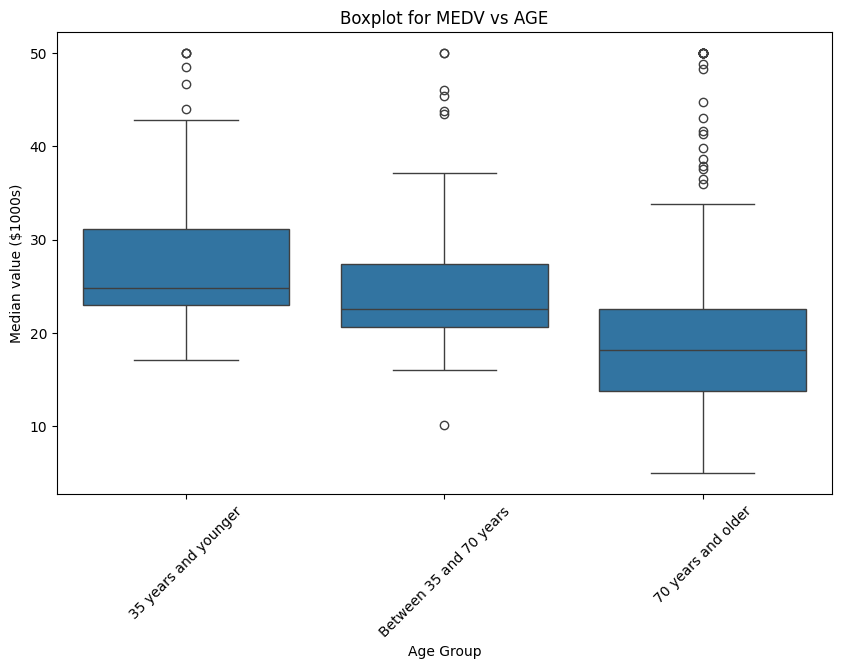

In [12]:
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, np.inf], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot for MEDV vs AGE')
plt.xlabel('Age Group')
plt.ylabel('Median value ($1000s)')
plt.xticks(rotation=45)
plt.show()


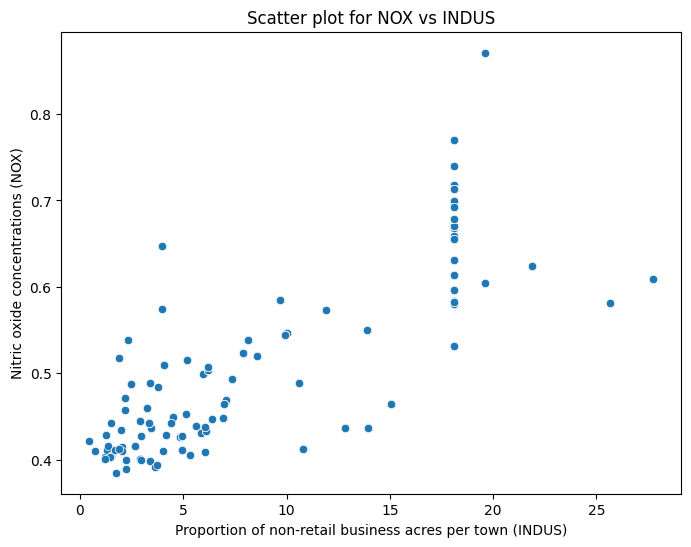

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter plot for NOX vs INDUS')
plt.xlabel('Proportion of non-retail business acres per town (INDUS)')
plt.ylabel('Nitric oxide concentrations (NOX)')
plt.show()


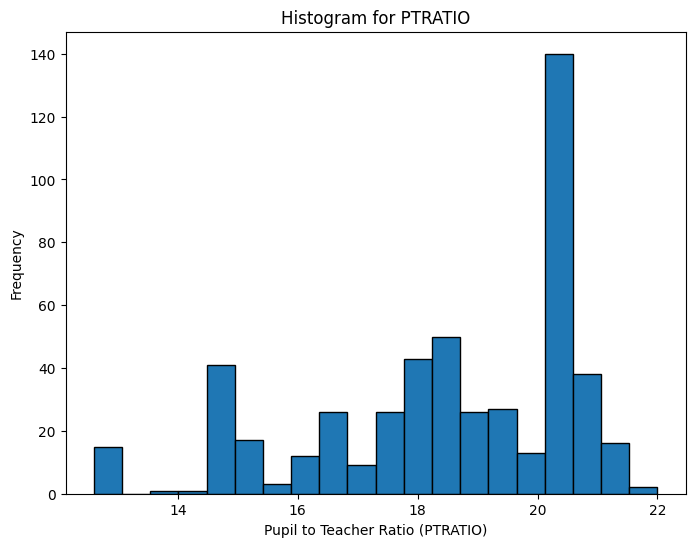

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='black')
plt.title('Histogram for PTRATIO')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()


In [6]:
# T-test for median value of houses bounded by the Charles river or not
charles_river_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_charles_river_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(charles_river_bounded, not_charles_river_bounded)
print("T-test for median value of houses bounded by the Charles river or not:")
print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river and those not bounded by the river.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median value of houses bounded by the Charles river and those not bounded by the river.")


T-test for median value of houses bounded by the Charles river or not:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river and those not bounded by the river.


In [7]:
from scipy.stats import f_oneway

# ANOVA for median values of houses for each proportion of owner occupied units built prior to 1940
age_groups = boston_df.groupby(pd.cut(boston_df['AGE'], bins=[0, 35, 70, np.inf], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older']))
f_stat, p_value = f_oneway(*(group['MEDV'] for name, group in age_groups))
print("\nANOVA for Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE):")
print("F-statistic:", f_stat)
print("P-value:", p_value)
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.")



ANOVA for Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE):
F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Conclusion: Reject the null hypothesis. There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.


In [8]:
from scipy.stats import pearsonr

# Pearson Correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
pearson_corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation between Nitric oxide concentrations and proportion of non-retail business acres per town:")
print("Correlation Coefficient:", pearson_corr)
print("P-value:", p_value)
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")



Pearson Correlation between Nitric oxide concentrations and proportion of non-retail business acres per town:
Correlation Coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98
Conclusion: Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [9]:
import statsmodels.api as sm

# Regression Analysis for the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
X = sm.add_constant(boston_df['DIS'])  # Add constant term
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
print("\nRegression Analysis for the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes:")
print(model.summary())



Regression Analysis for the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        18:59:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|  